In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import wbdata
import requests
import pandas as pd
from datetime import datetime

# This will give you a variable that refers to the  indicator of total population of each country, 
# it is a wbdata.client.SearchResult, with this we can 
indicator = wbdata.get_indicators('SP.POP.TOTL')

# Here the countries that I want to be included in my search have been listed, if I wanted to
# use all of them I would just use "all"
countries = ["USA", "CHN", "FRA"]

# Here I am defining the time range that I want to be used.
#start_date = datetime(2000, 1, 1)  # this numbers reflect ( year, month, day )
#end_date = datetime(2023, 12, 31)

# Fetch data from the World Bank API
df = wbdata.get_dataframe({"SP.POP.TOTL" : "Population, total"}, country=["FRA","USA"], date = ( "1960", "2025") )

df = df.reset_index()
df = df.rename(columns={"date": "Years", "country": "Country", "Population, total": "Population"})
df["Years"] = df["Years"].astype(int)
df["Population"] = pd.to_numeric(df["Population"], errors="coerce")
df["Population"] = df["Population"].astype(int)
df = df.dropna()
df = df.sort_values(by=["Country", "Years"])
df.head()

,Country,Years,Population
63,France,1960,47412964
62,France,1961,47905982
61,France,1962,48389516
60,France,1963,48877567
59,France,1964,49401492


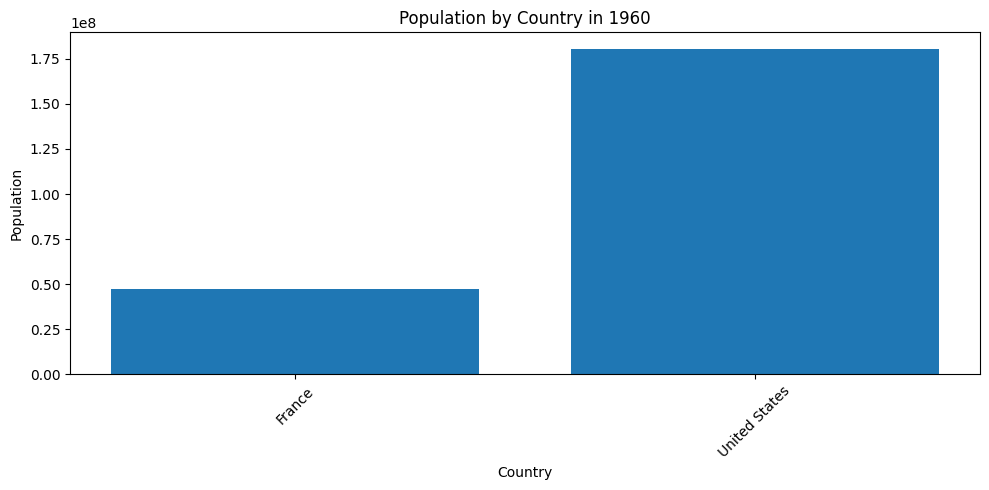

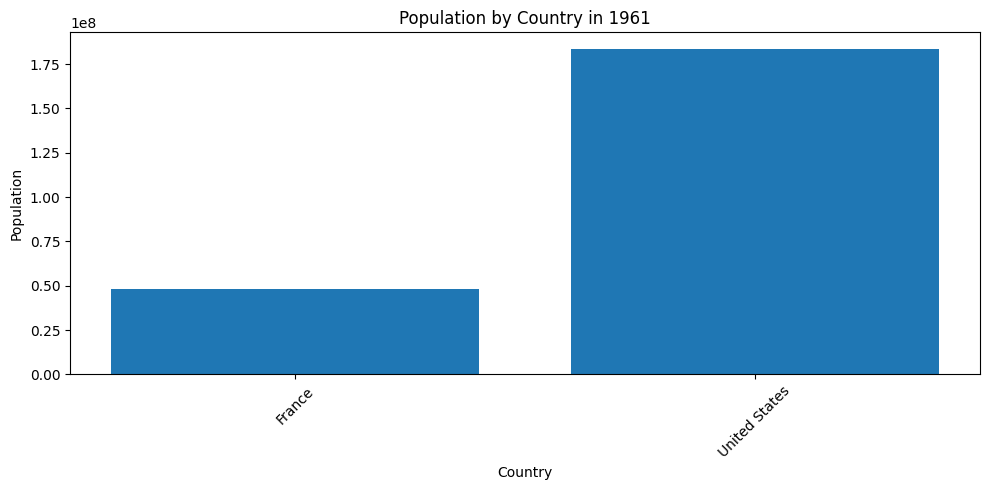

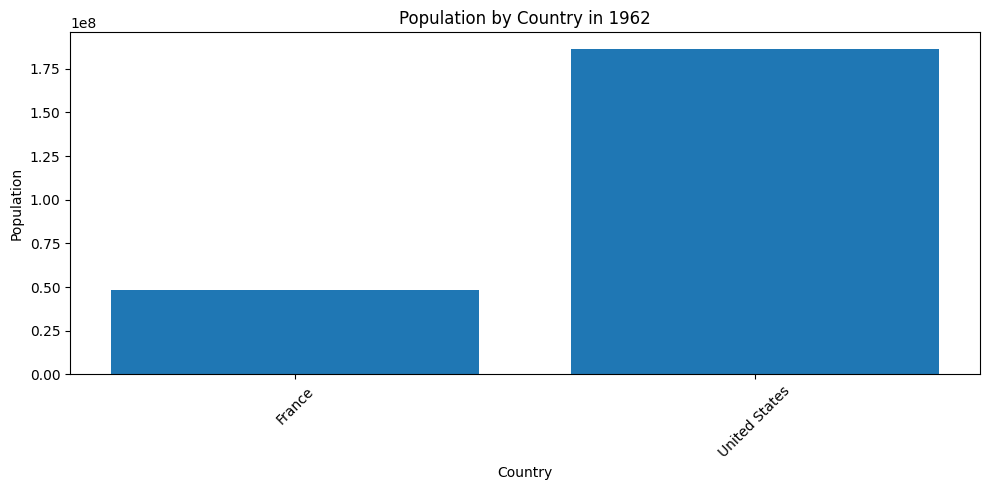

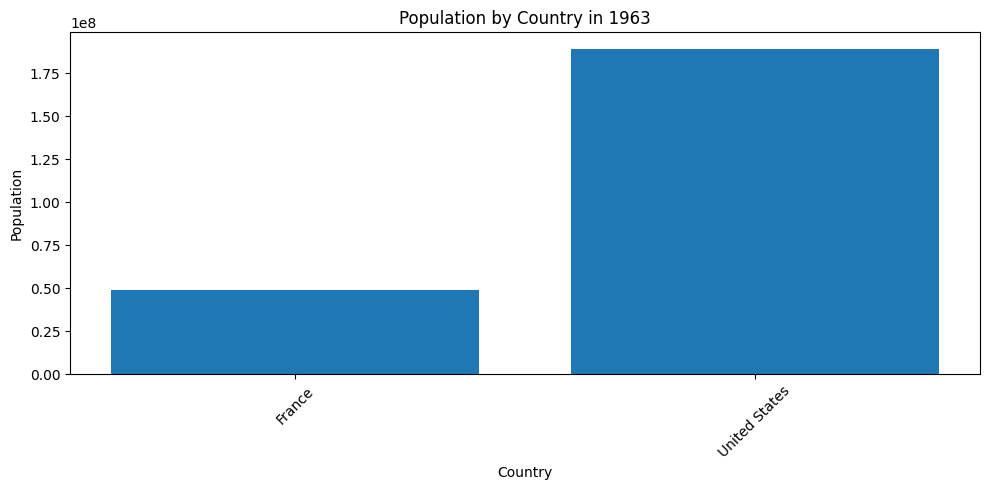

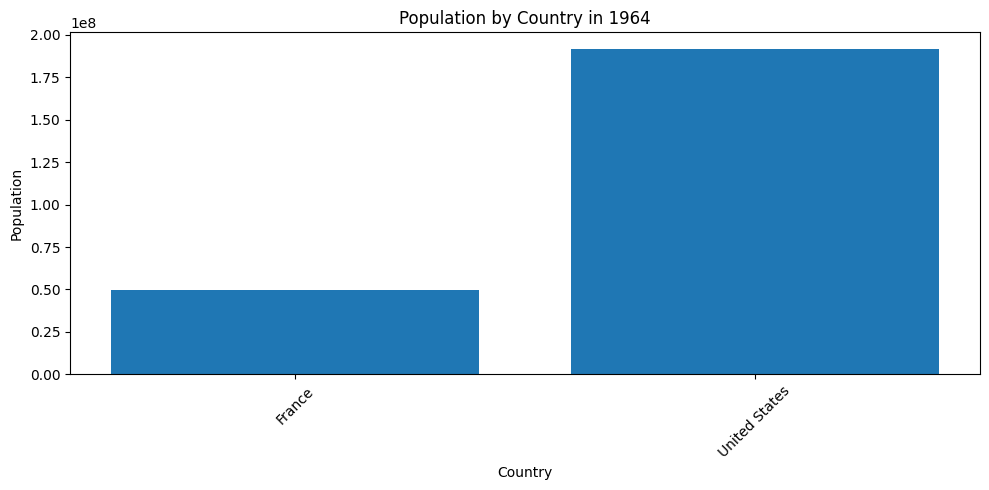

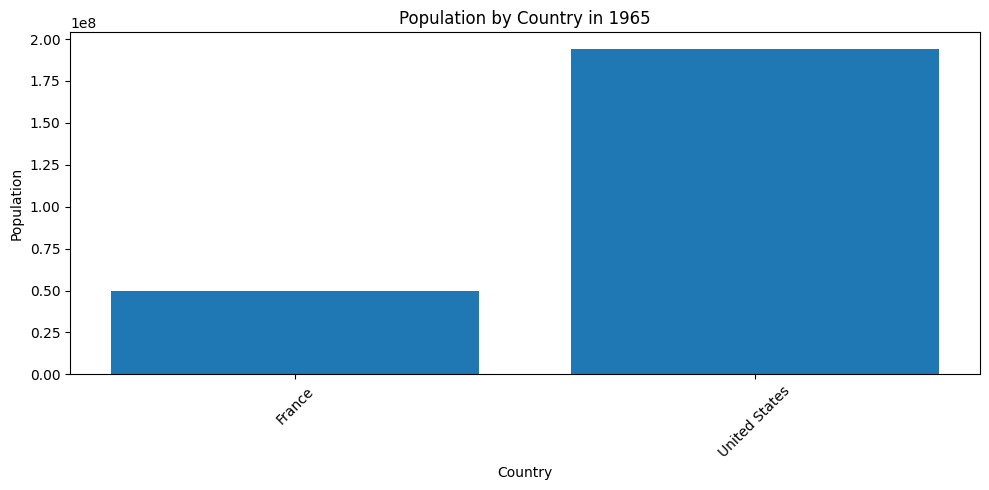

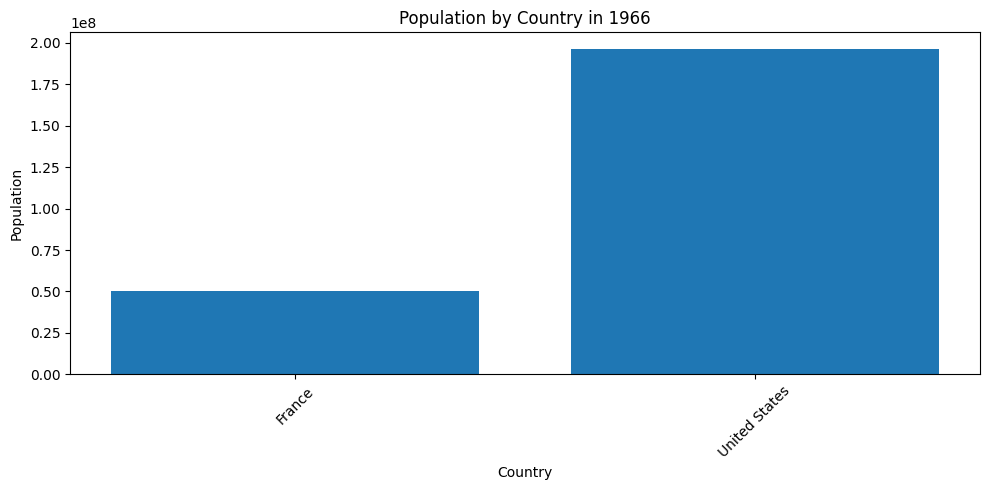

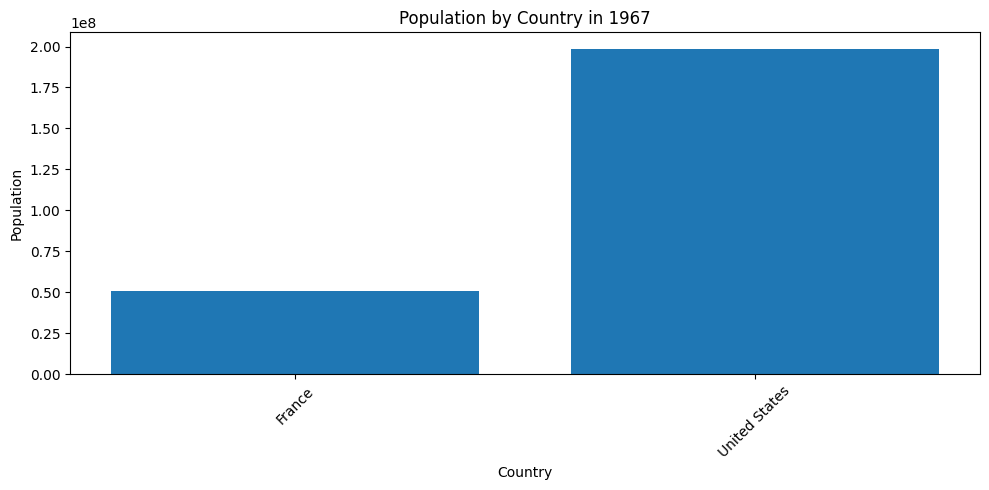

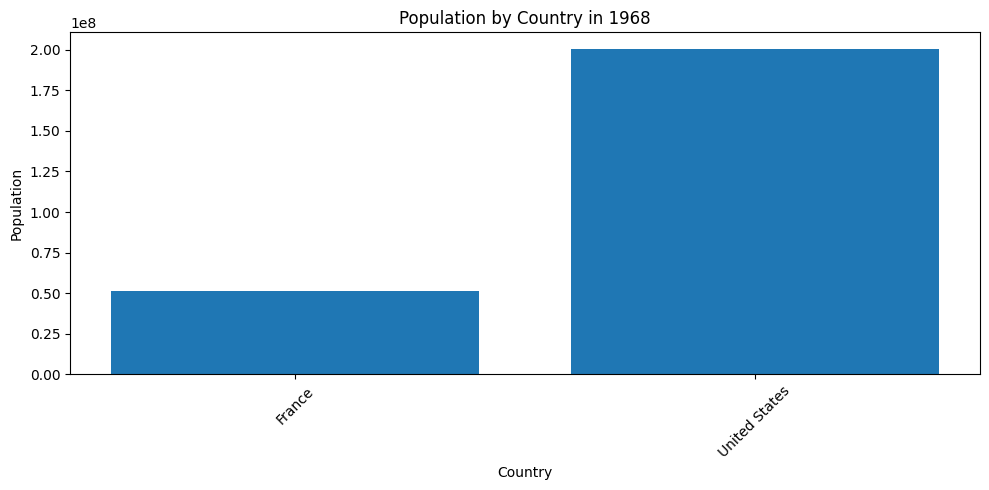

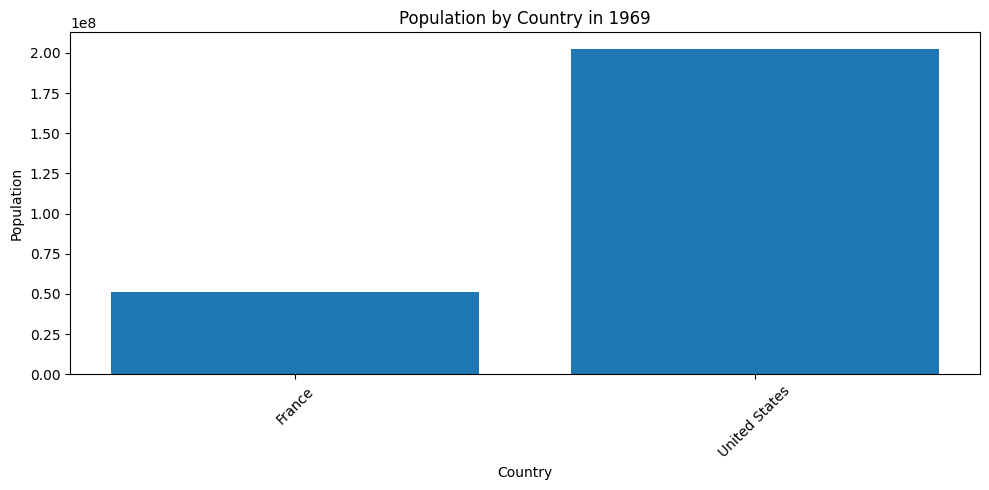

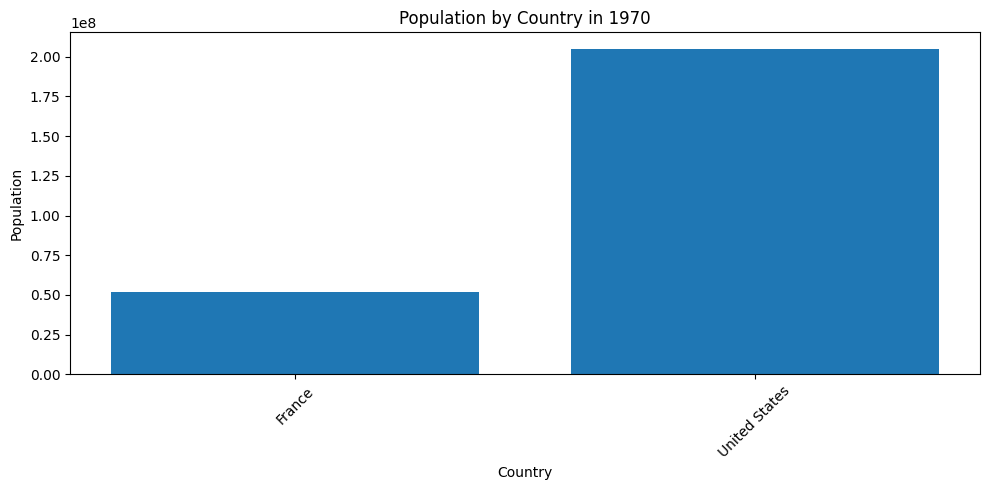

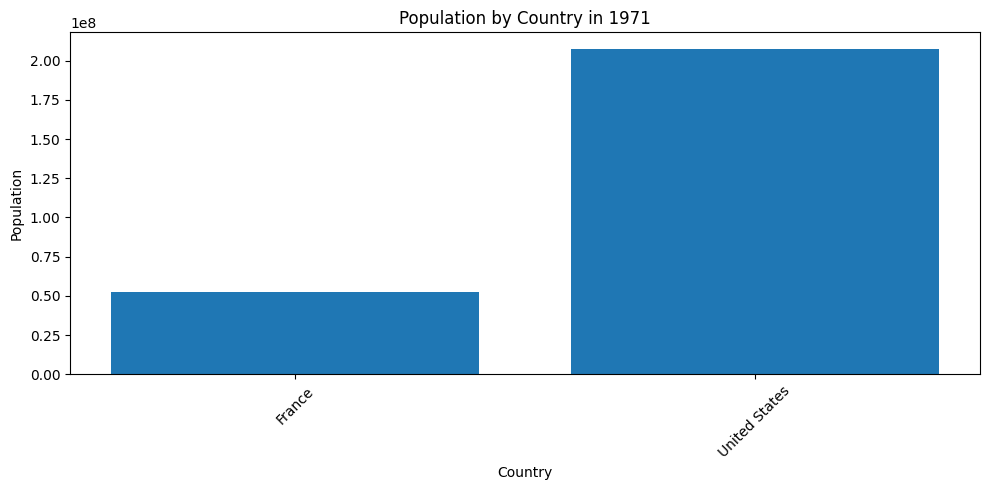

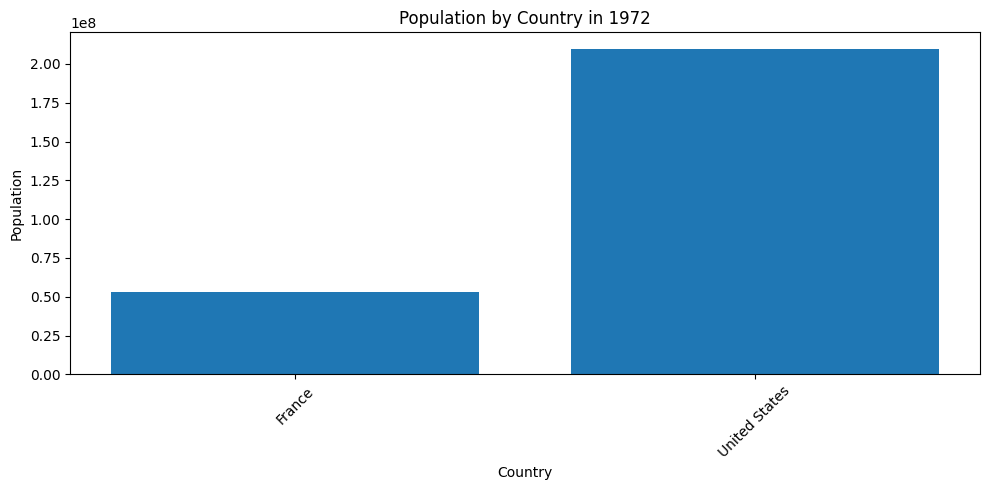

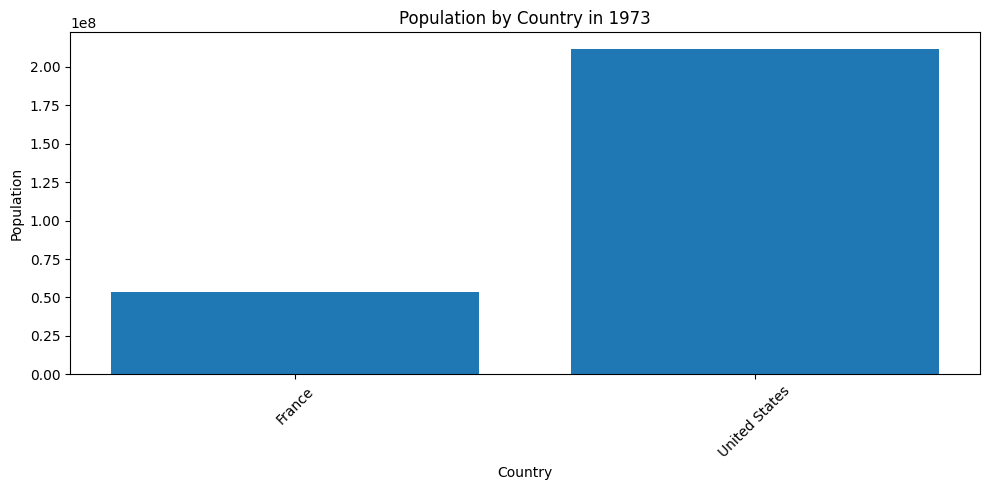

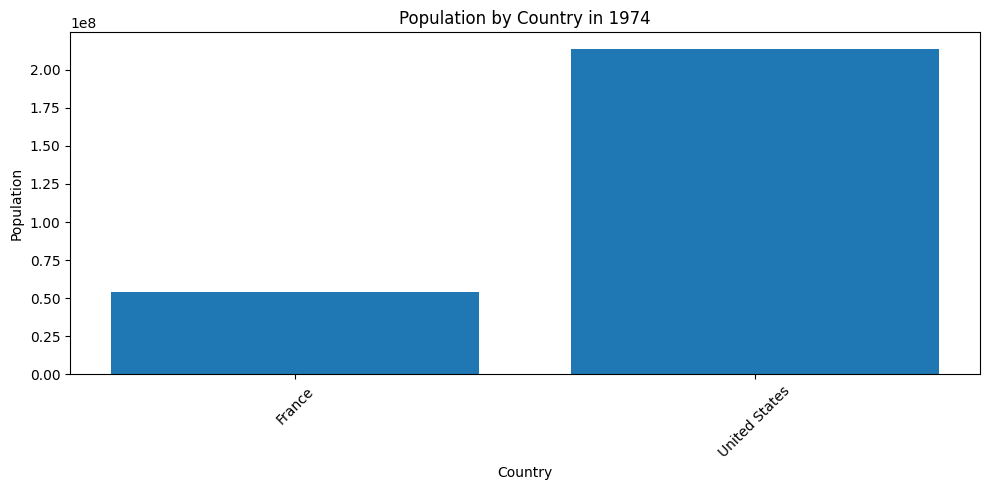

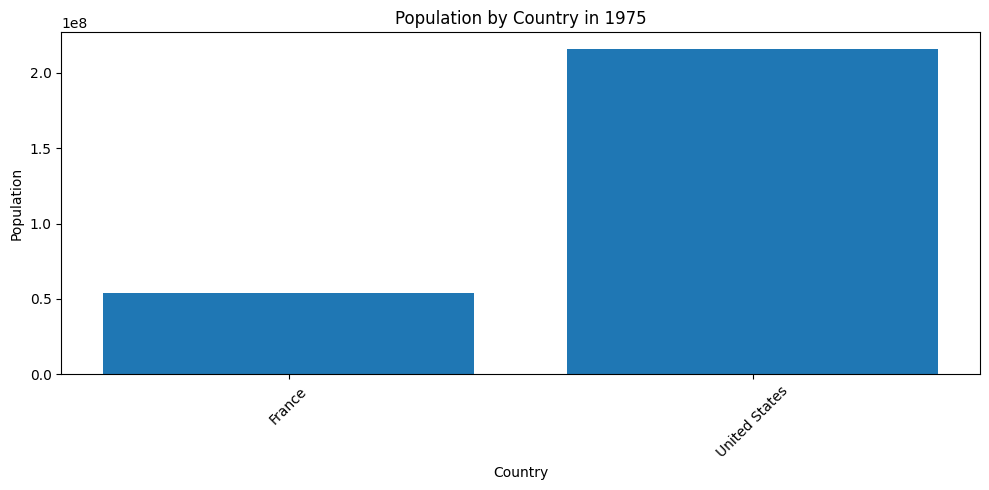

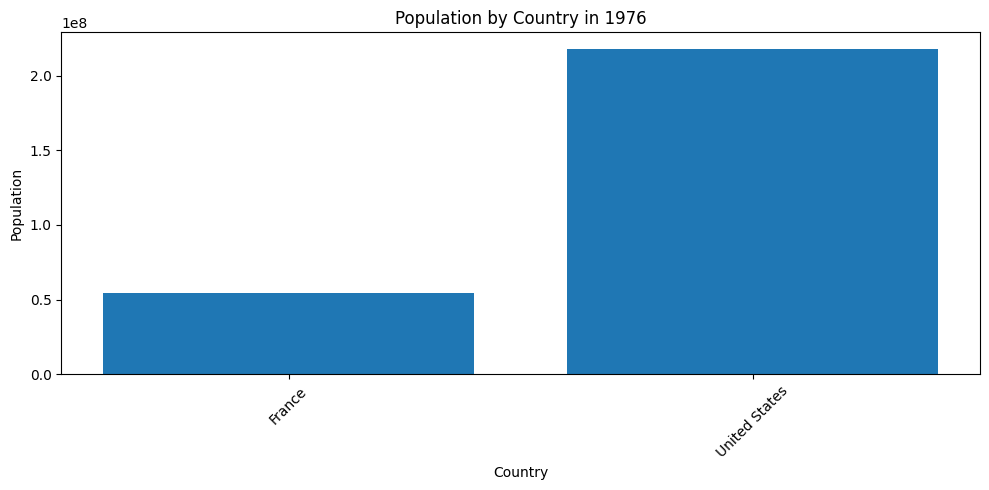

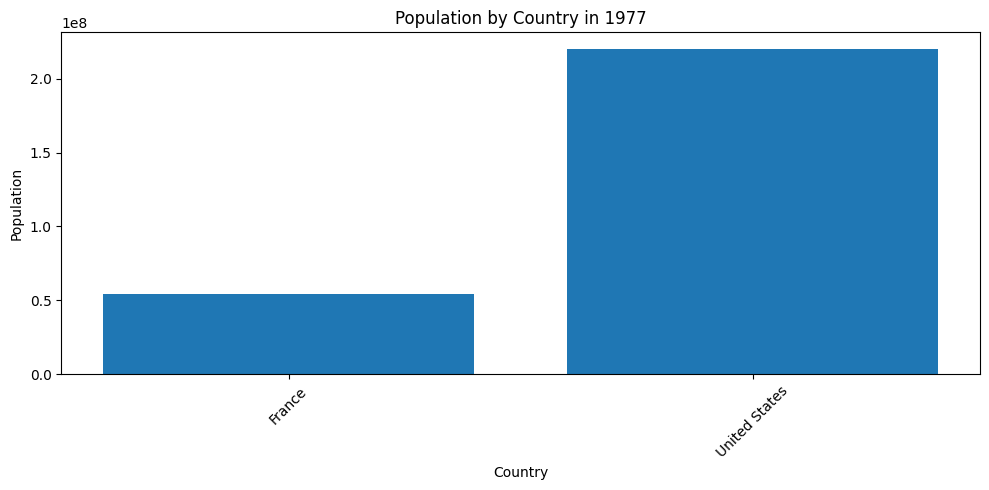

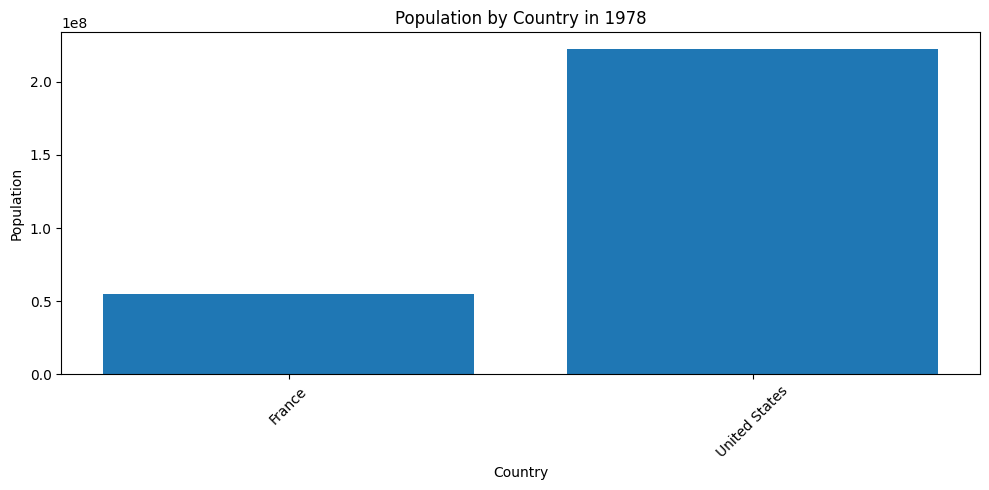

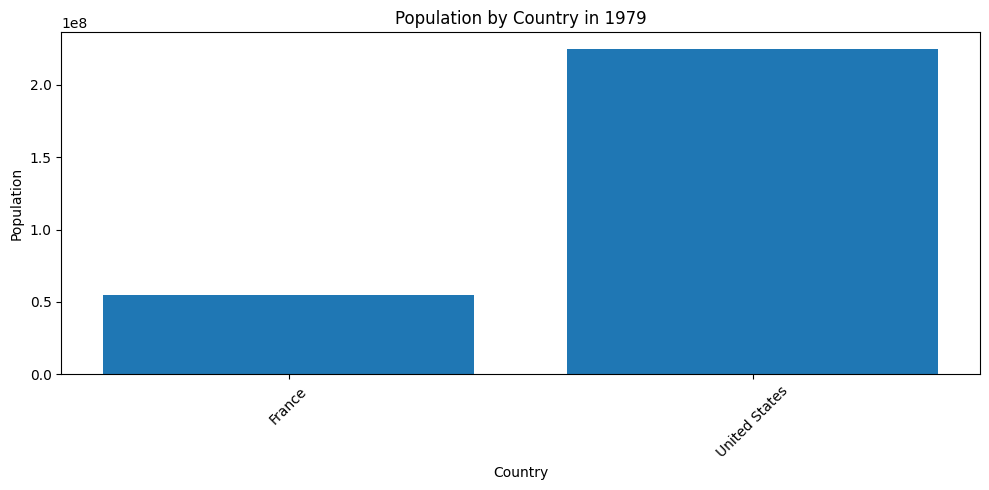

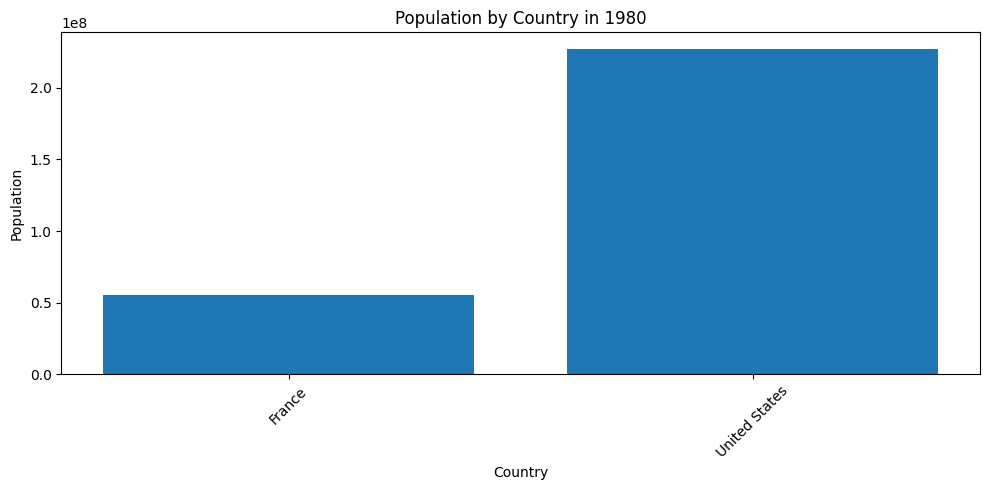

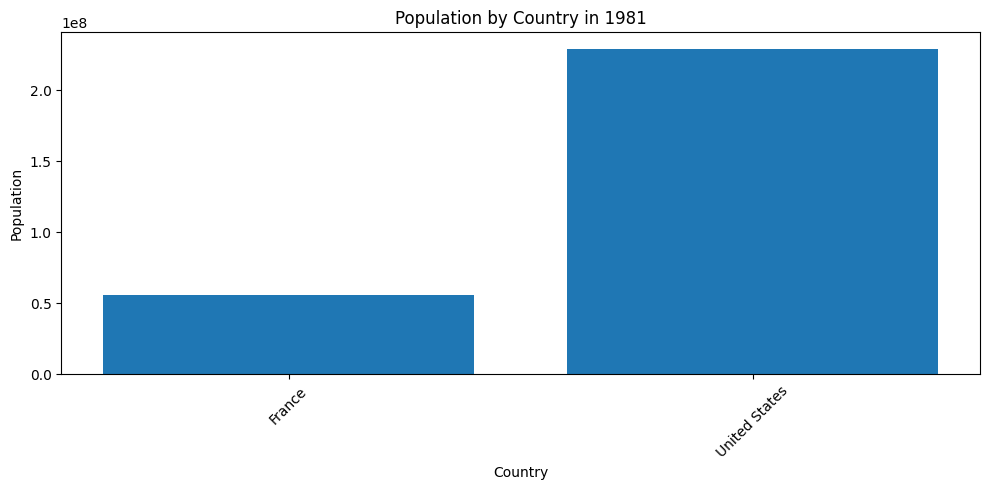

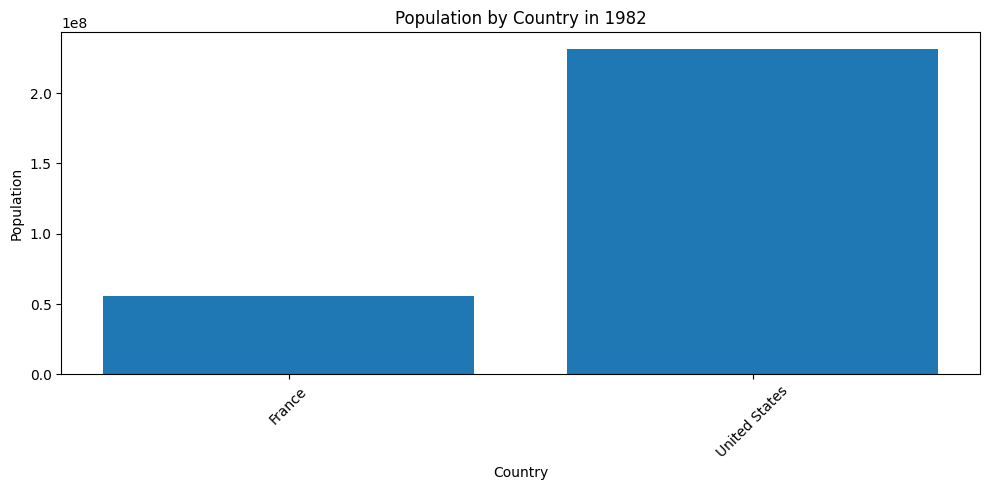

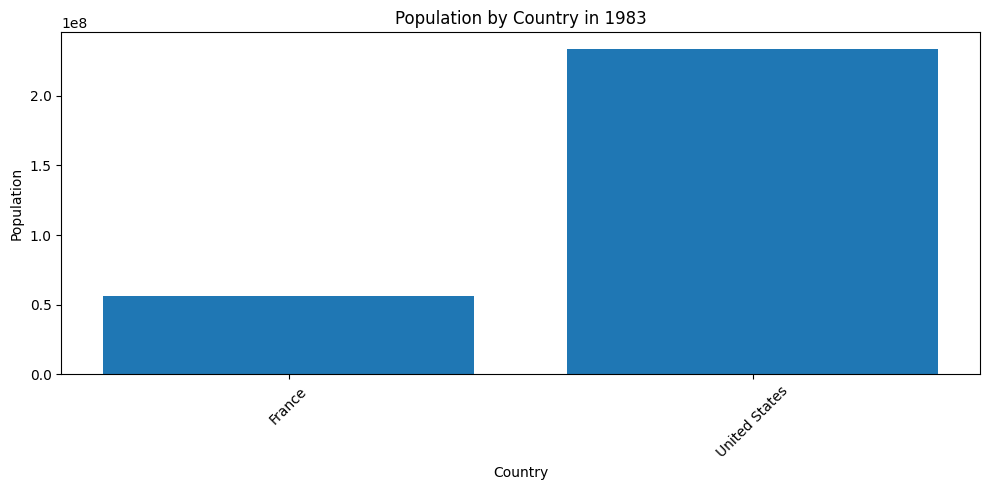

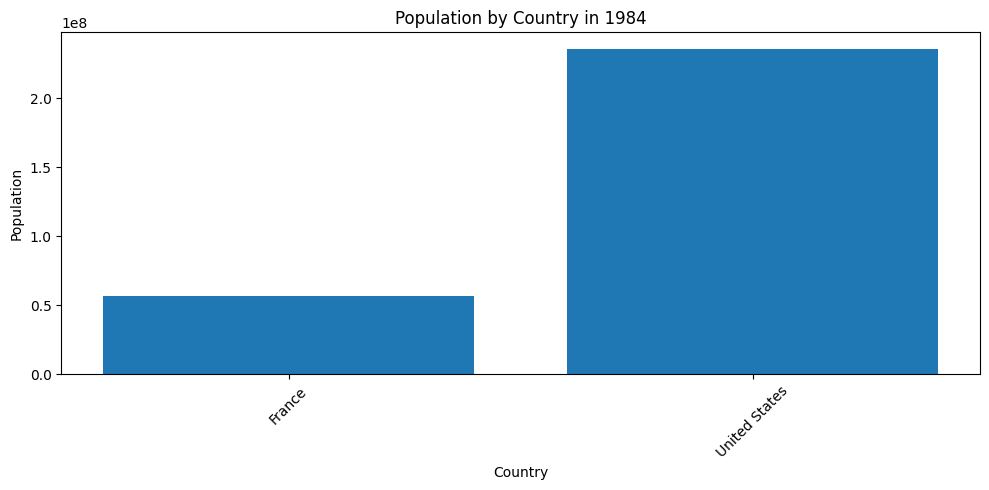

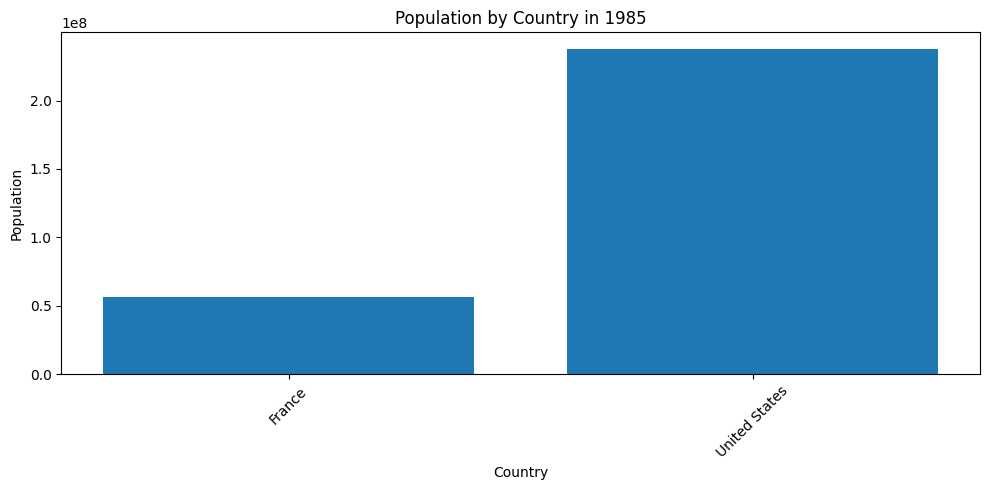

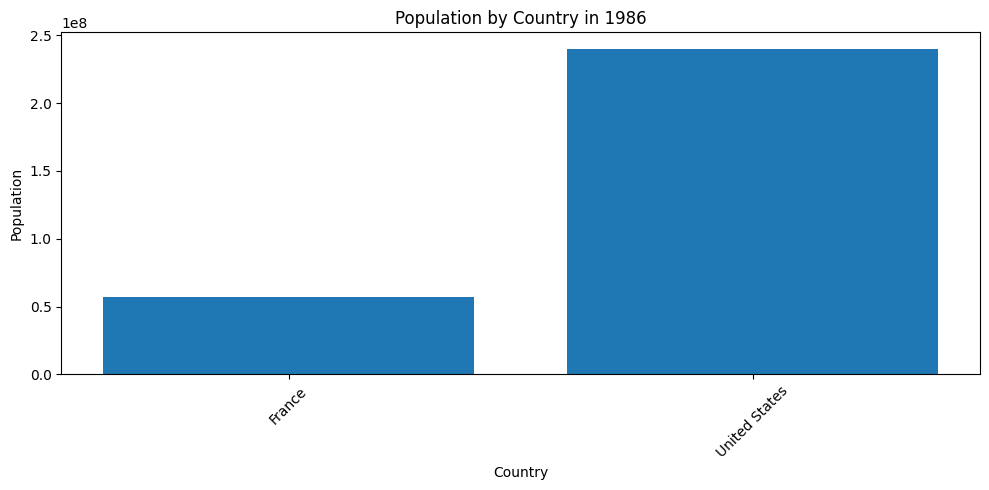

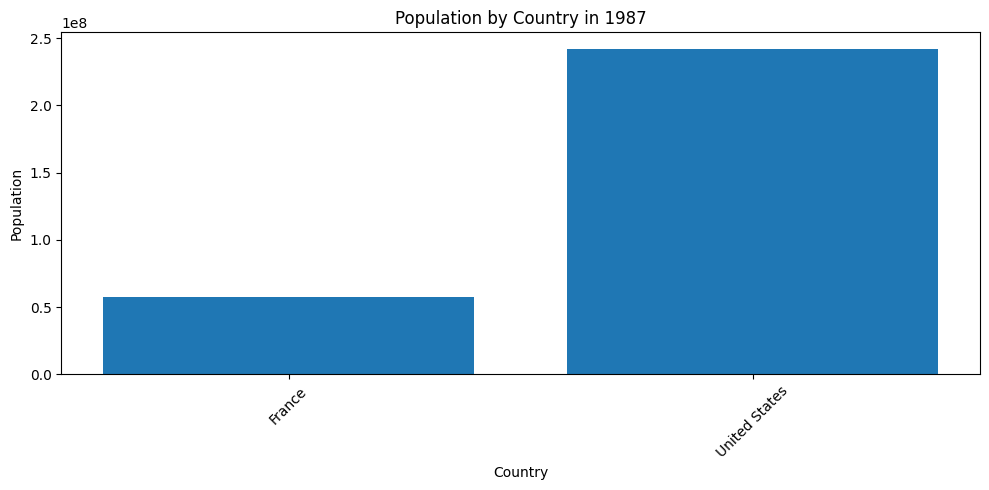

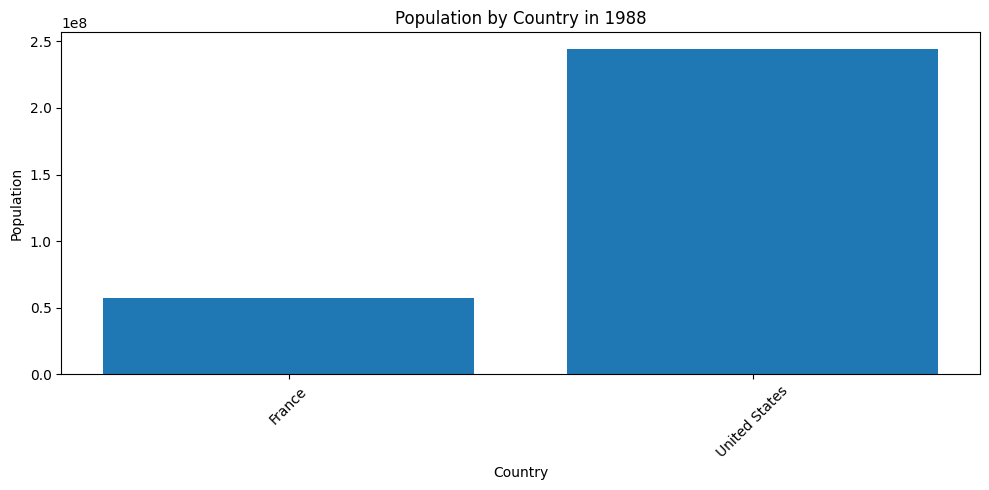

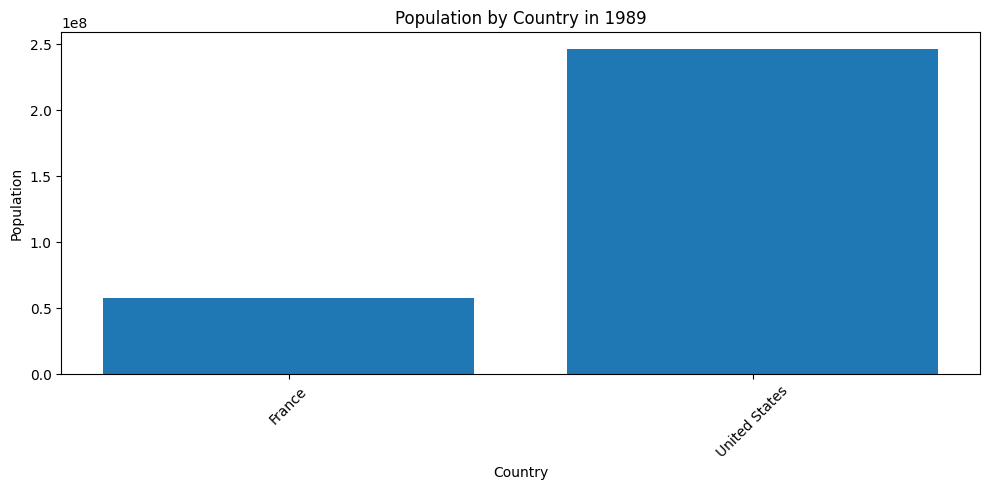

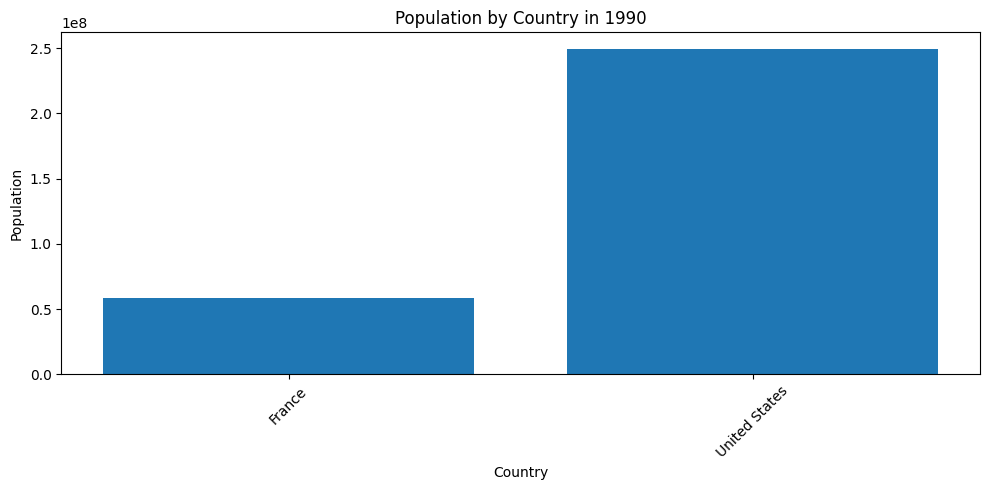

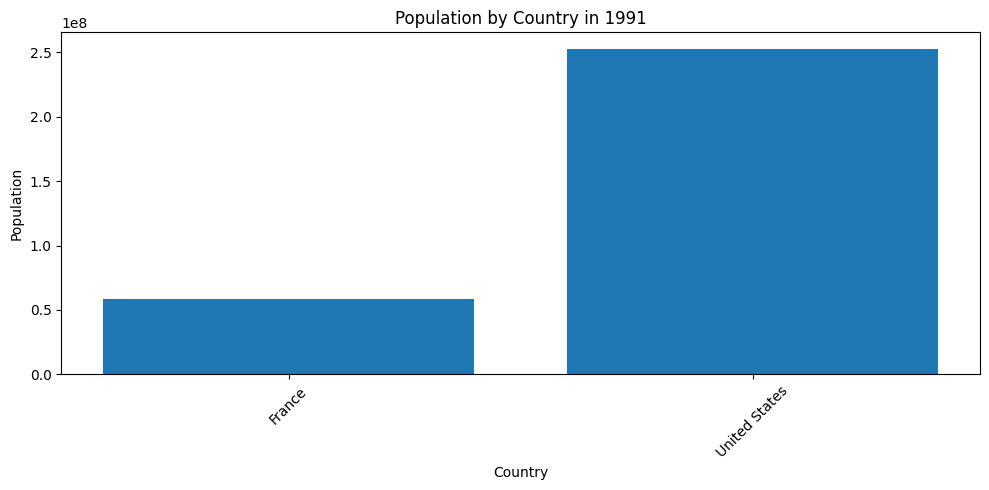

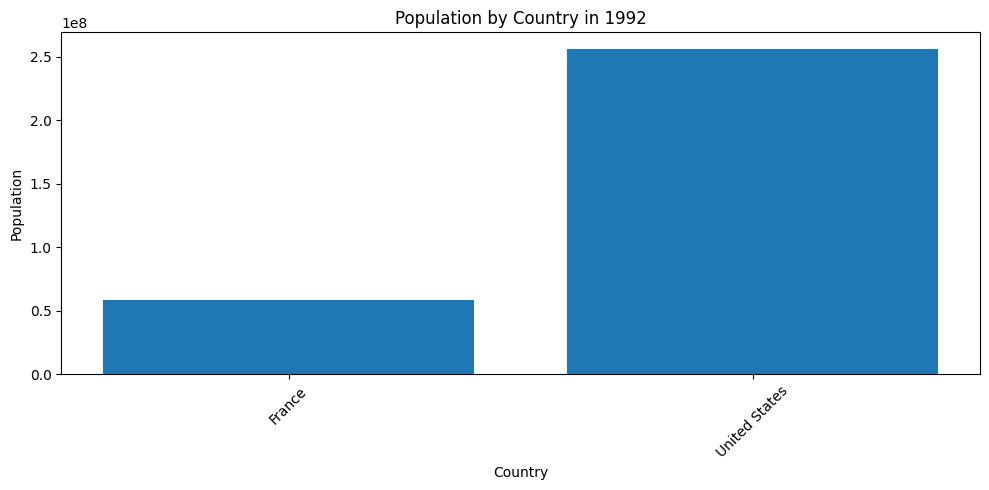

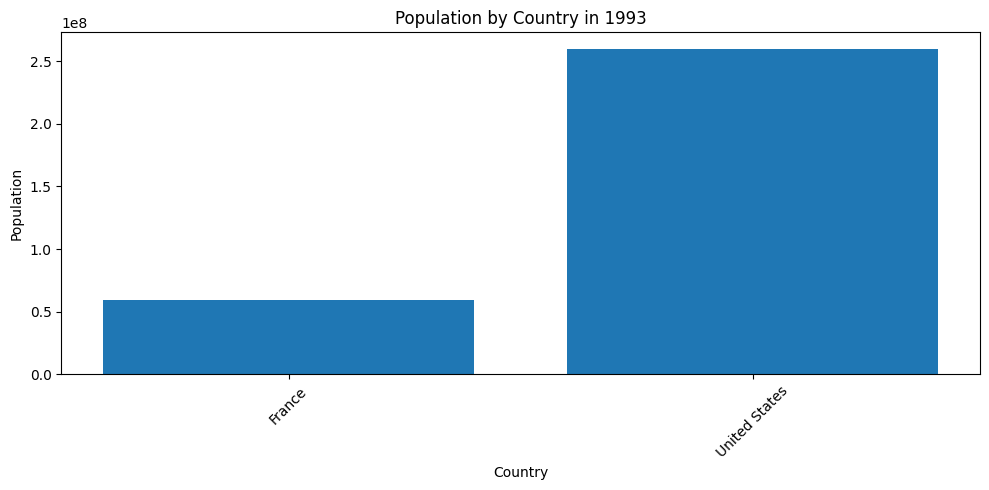

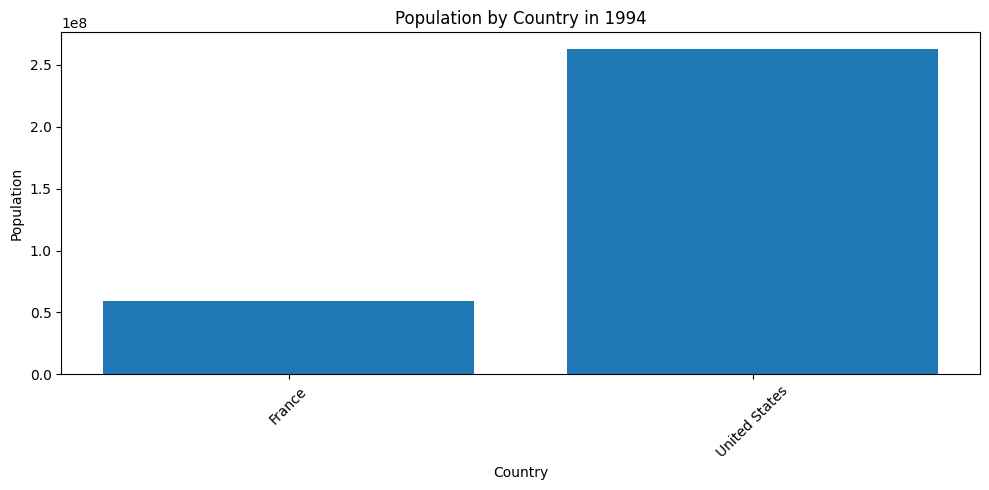

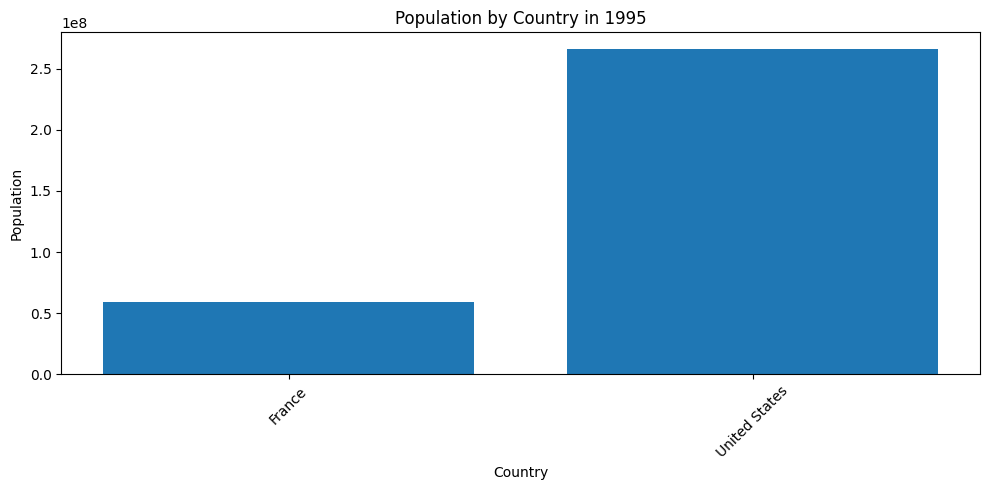

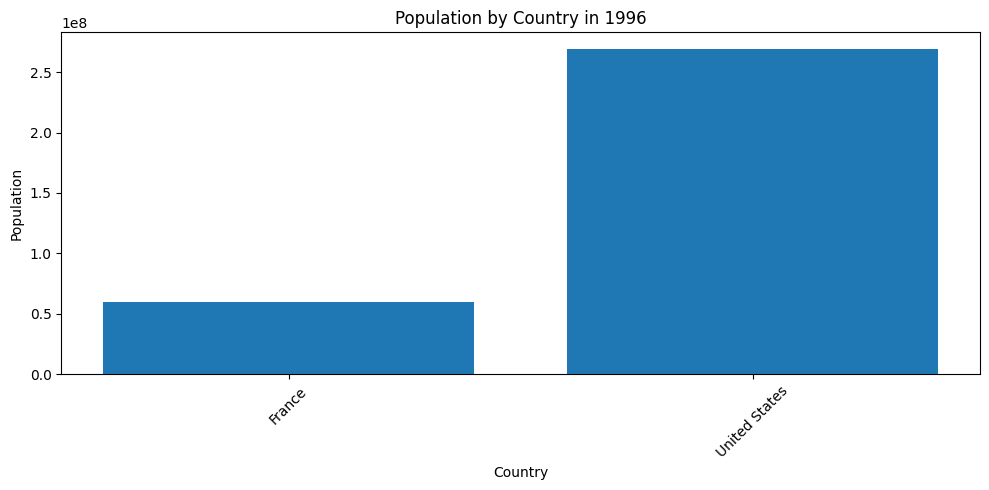

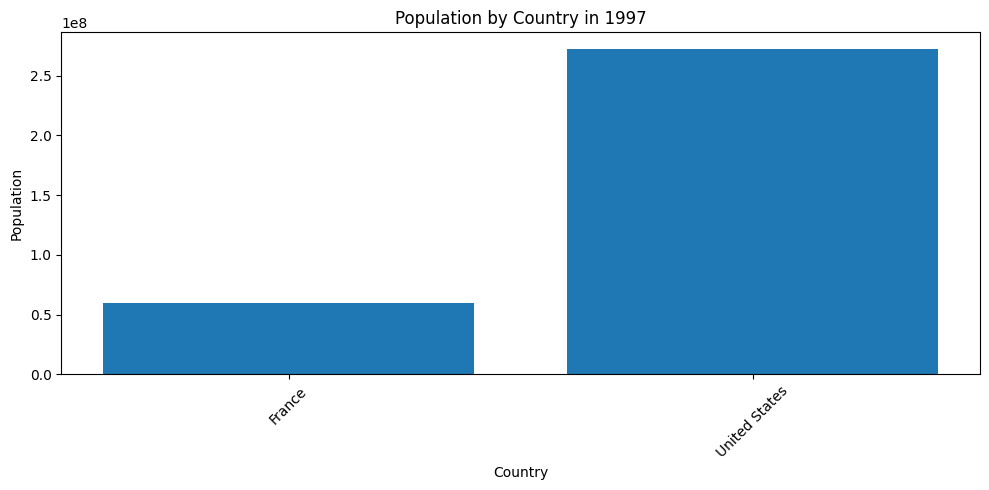

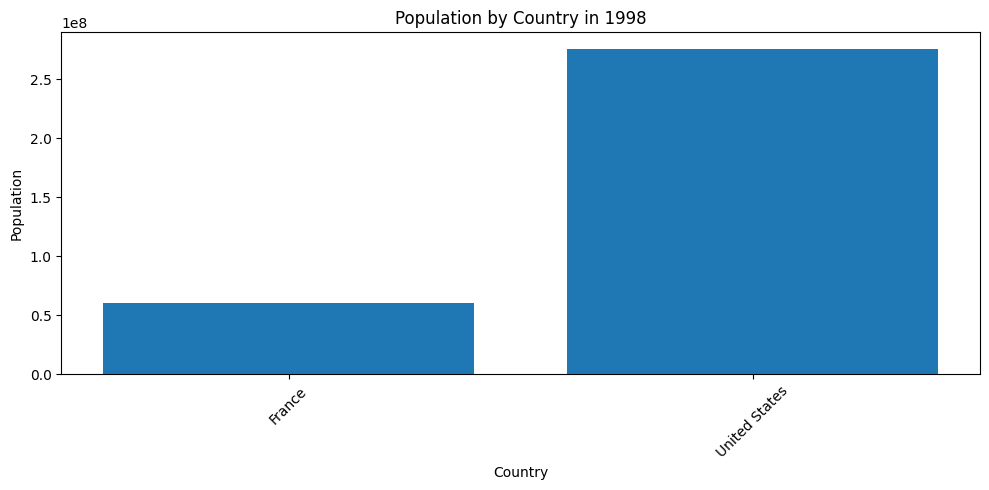

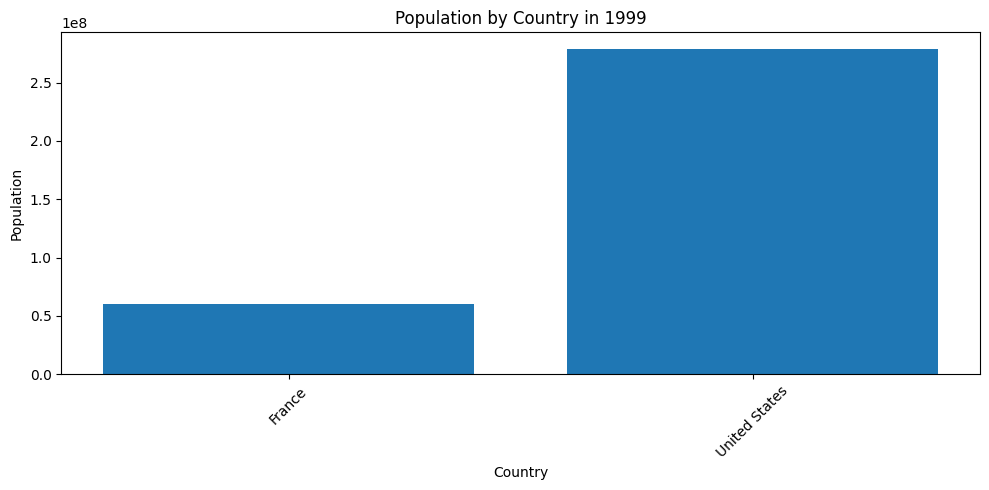

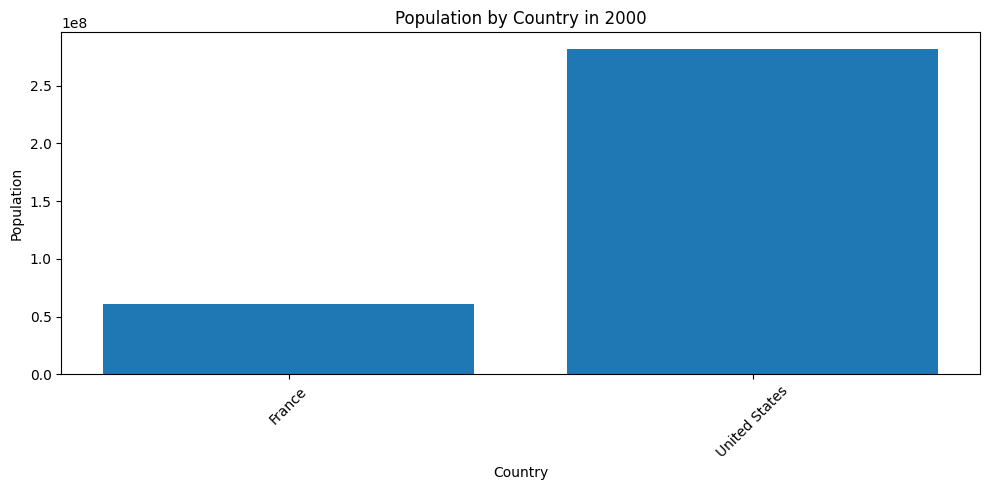

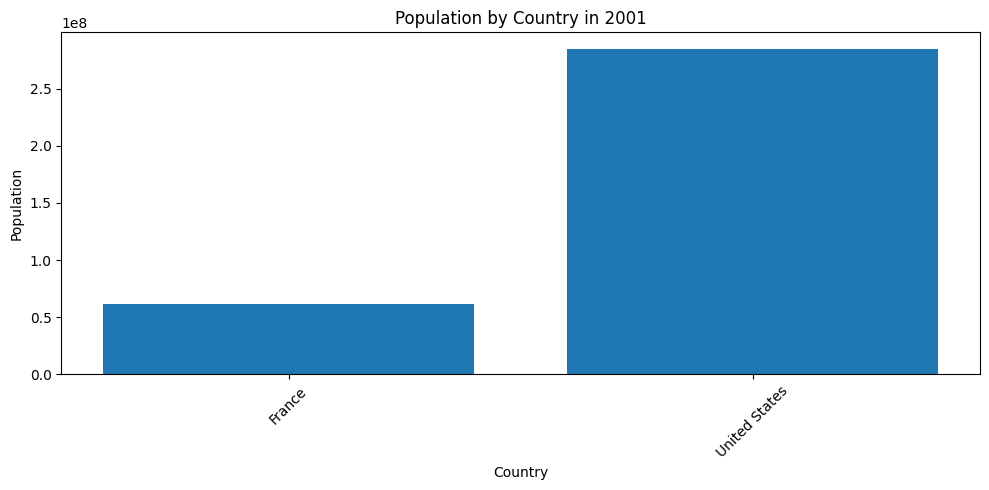

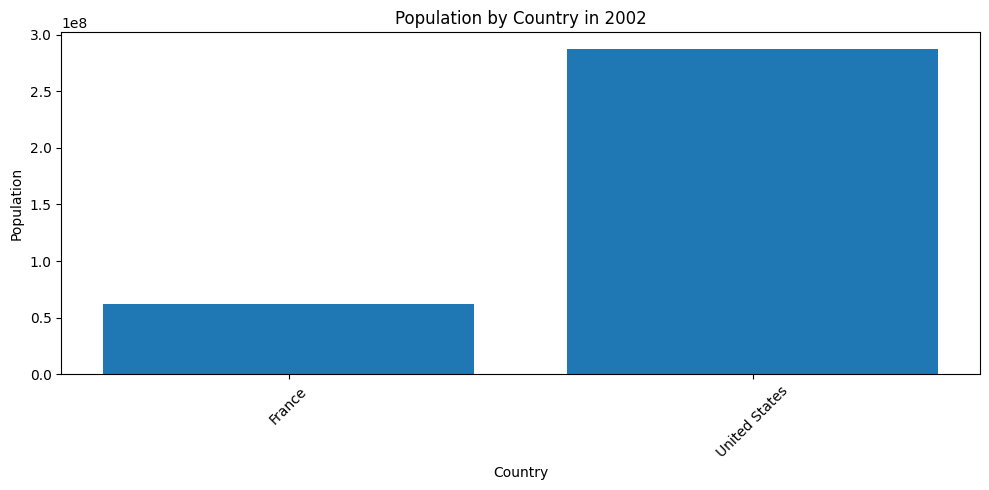

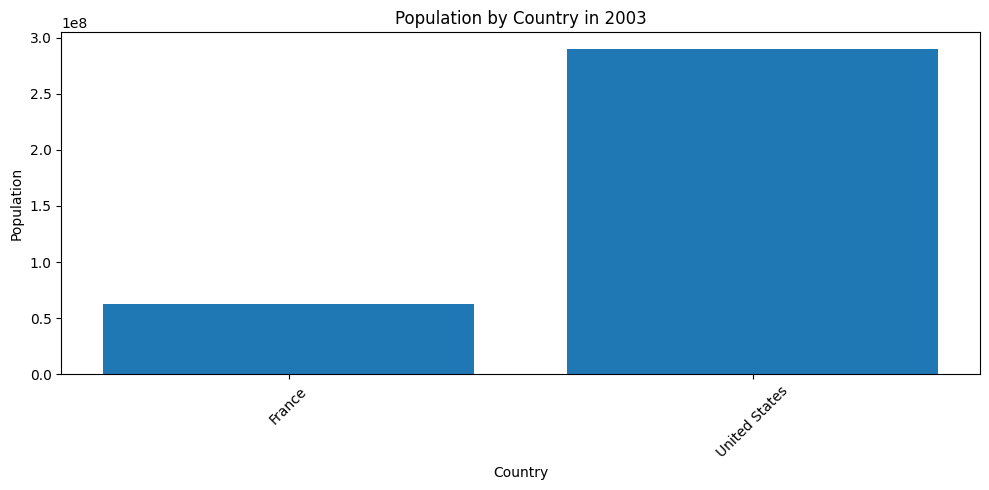

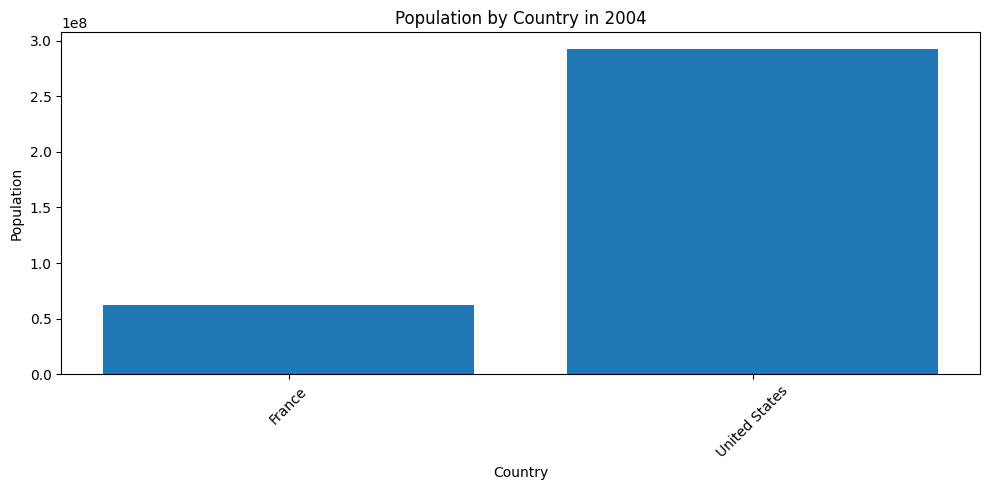

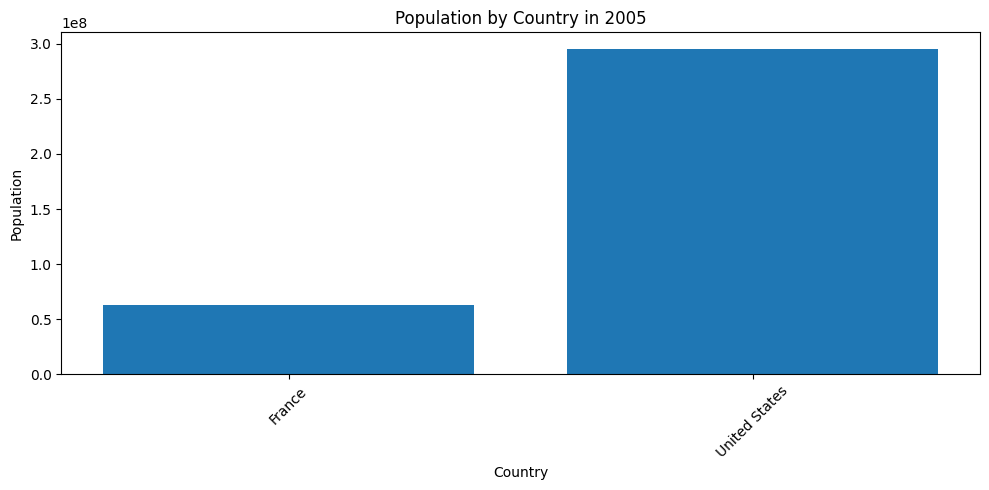

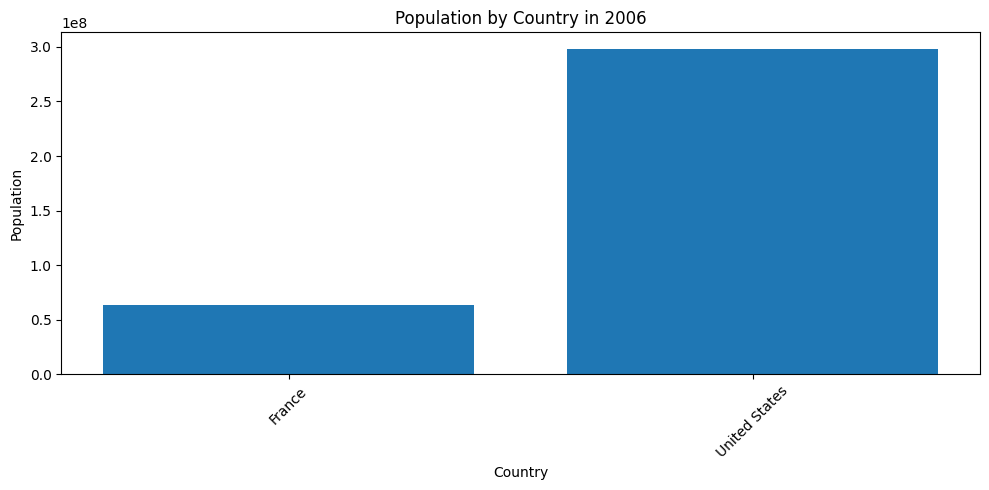

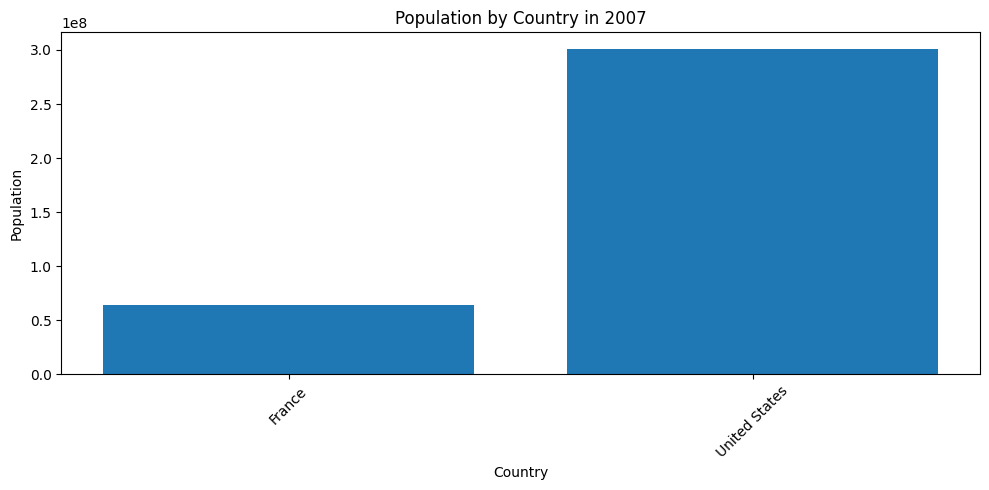

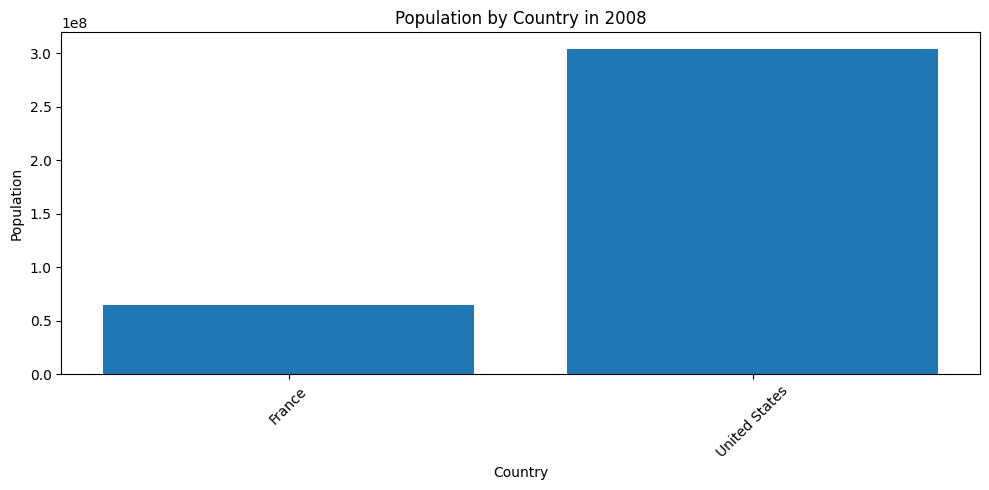

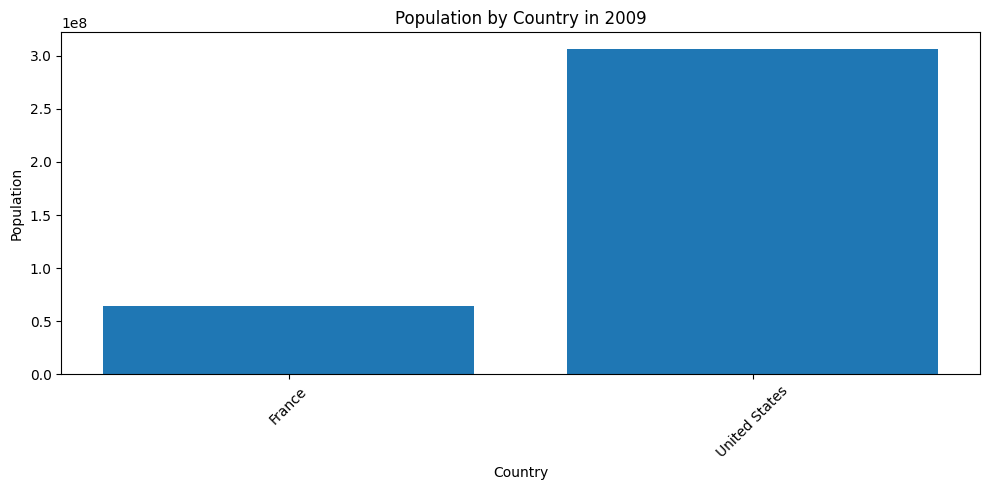

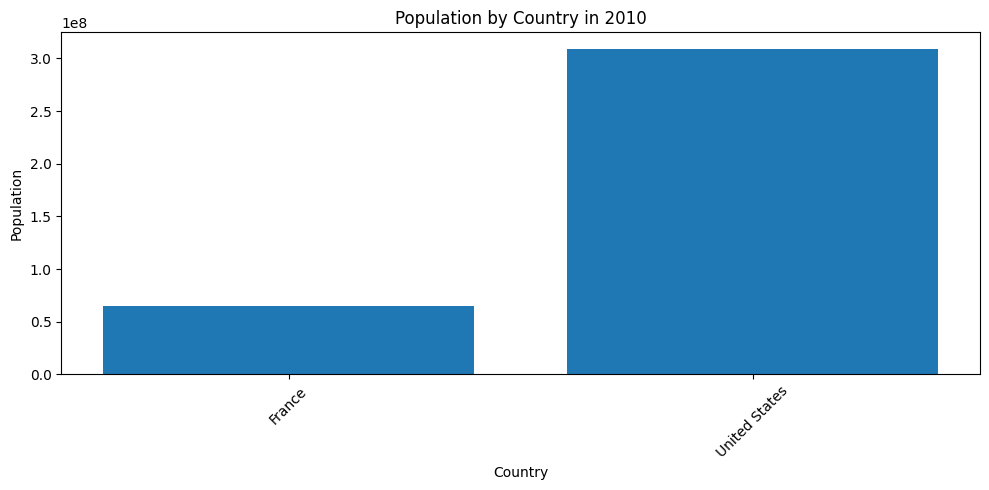

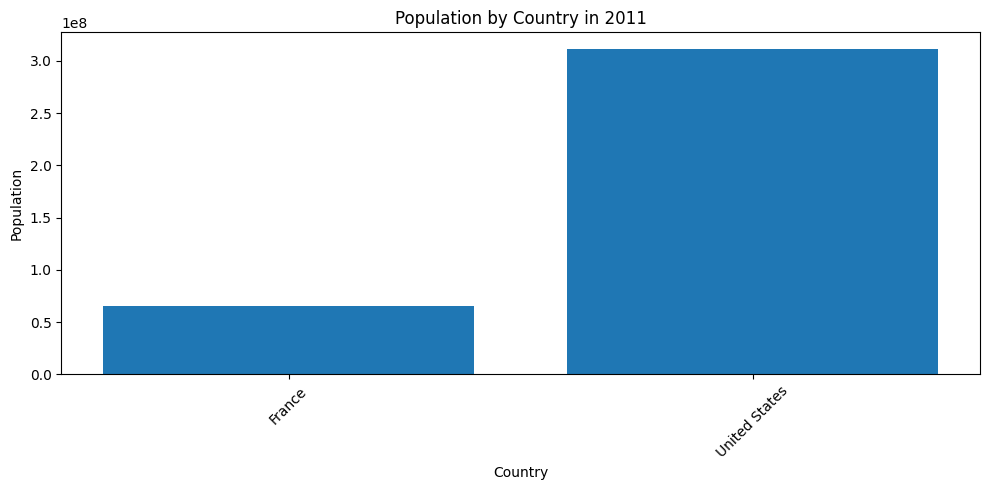

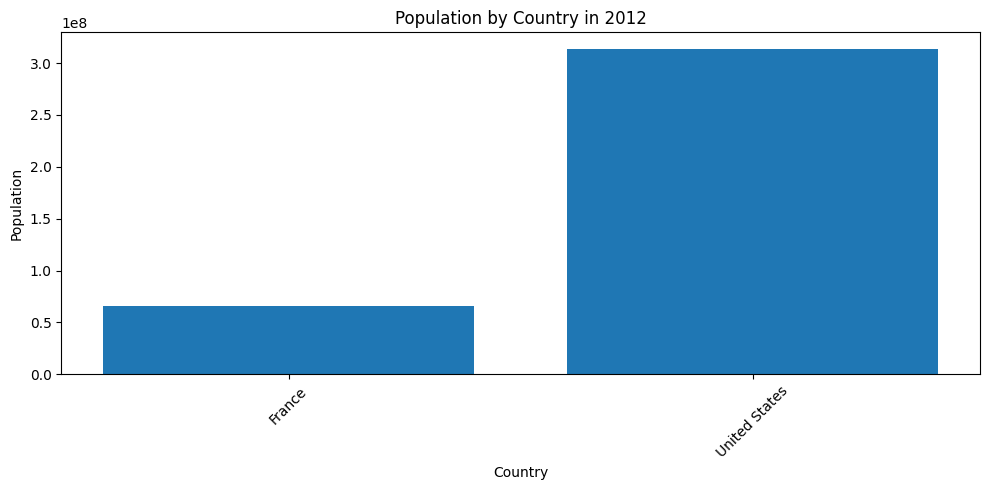

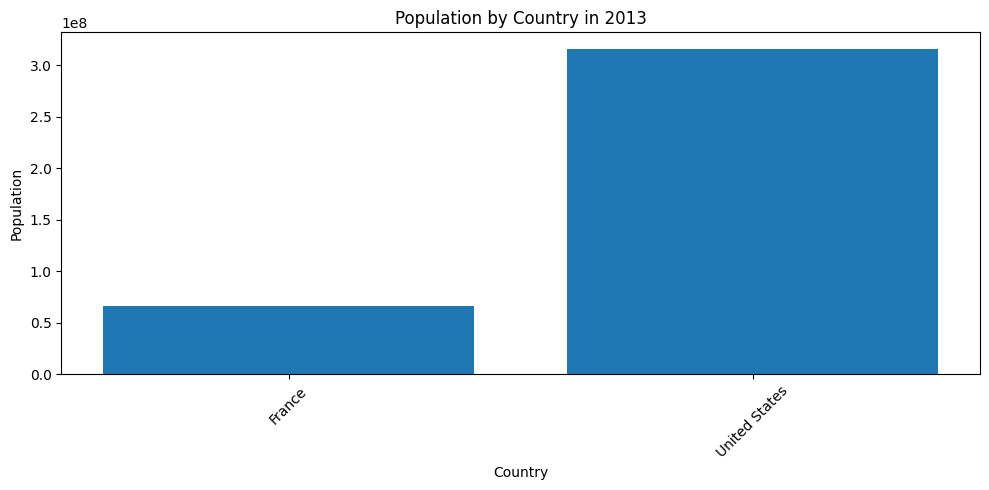

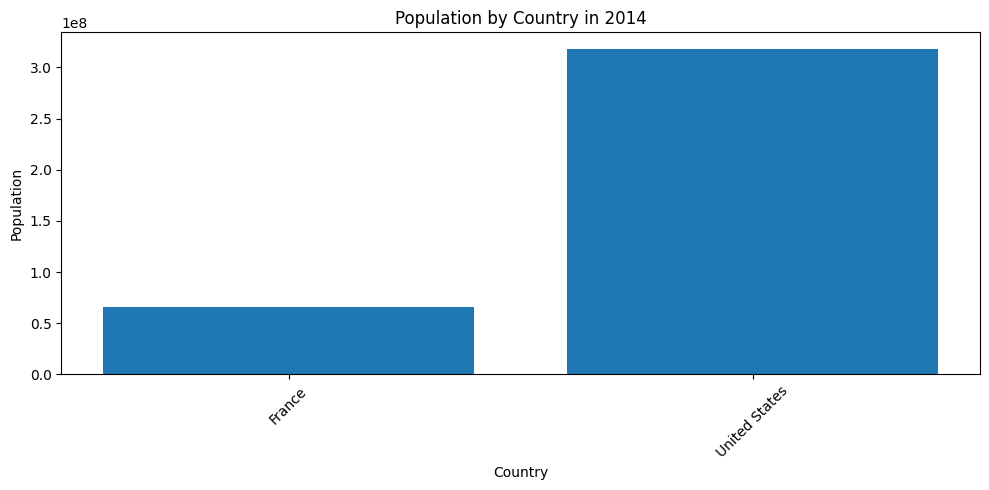

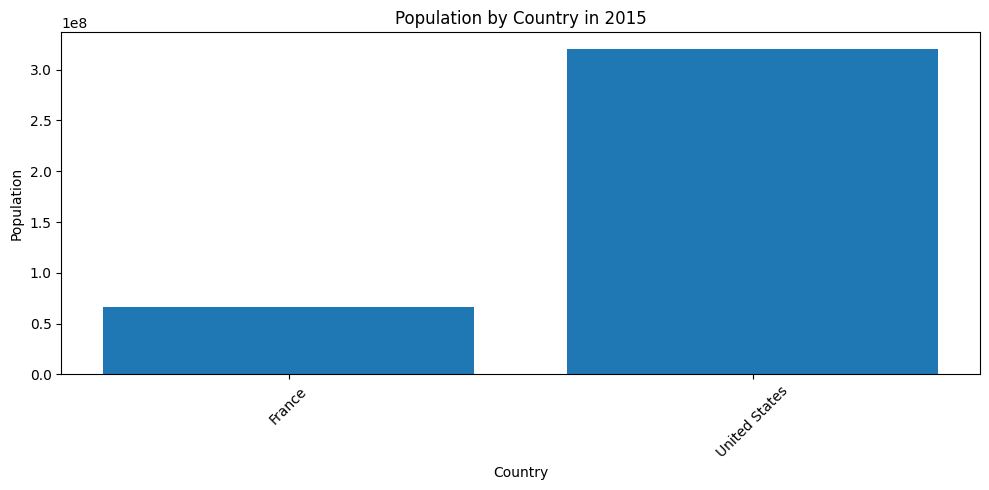

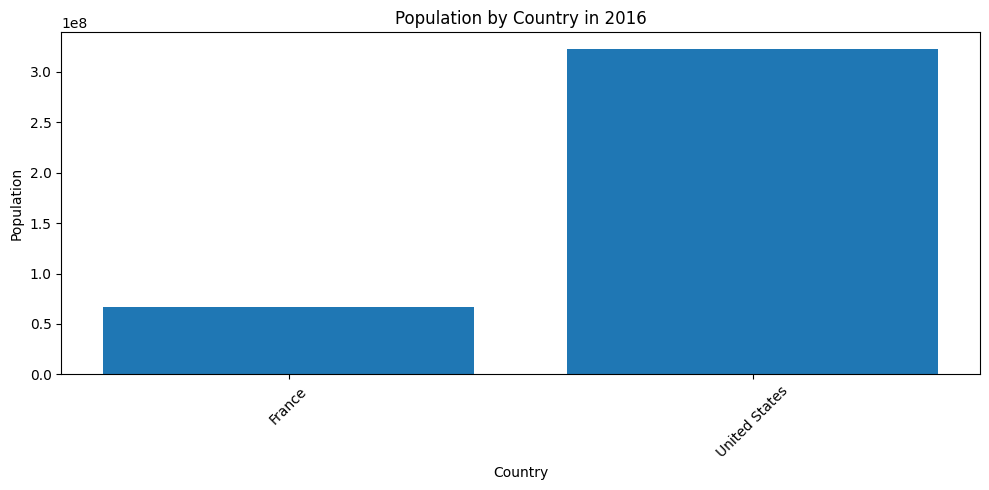

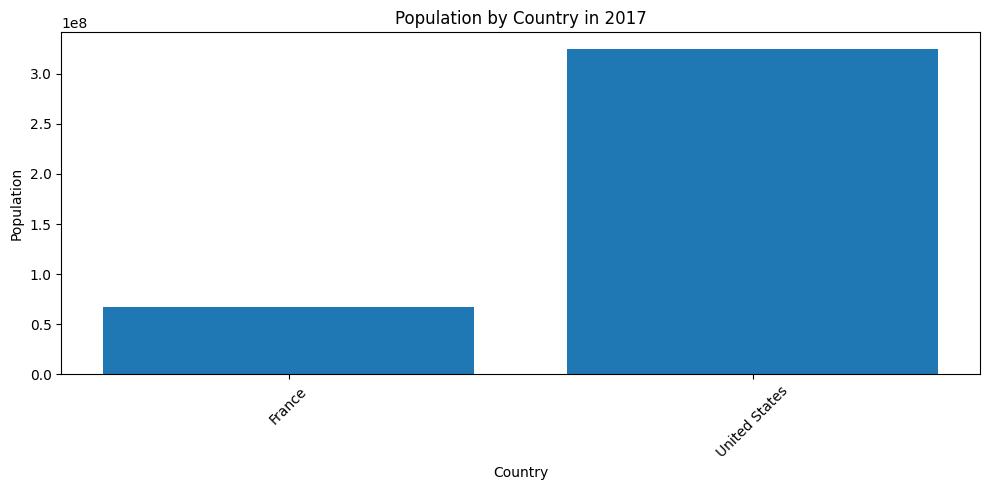

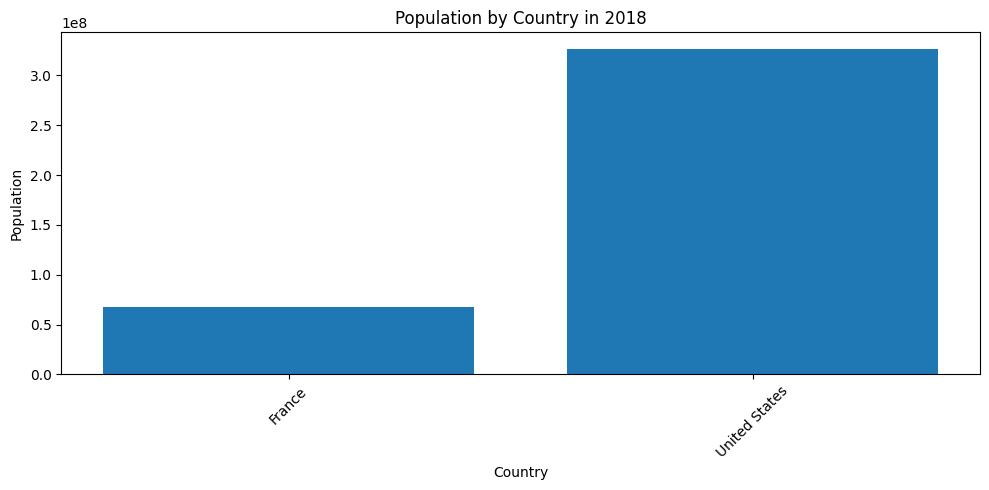

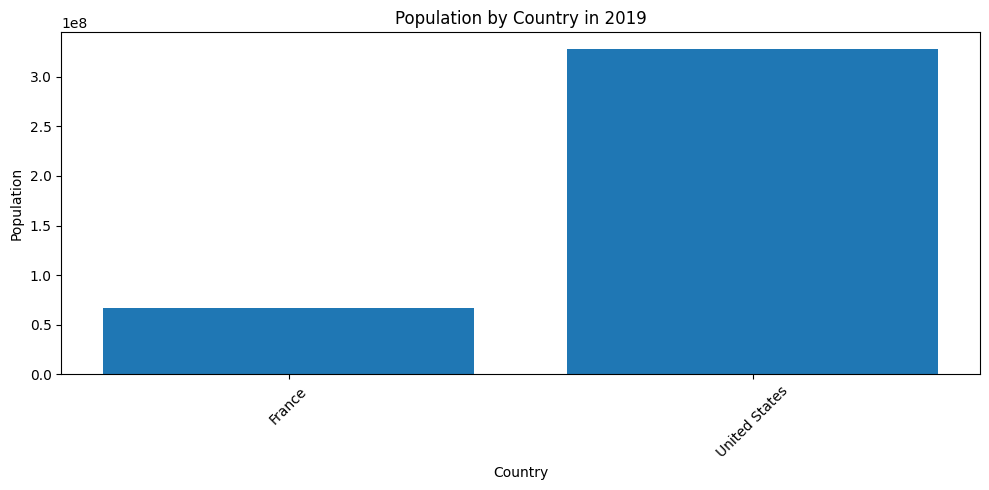

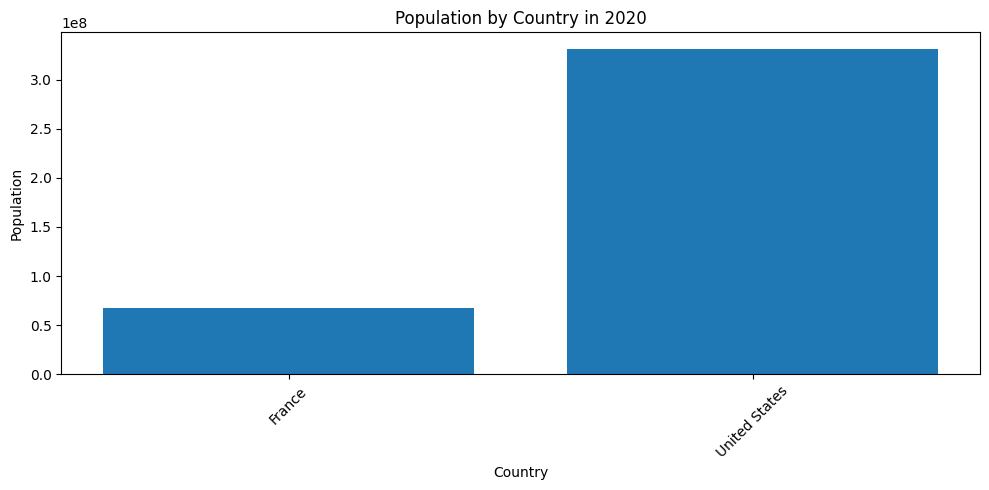

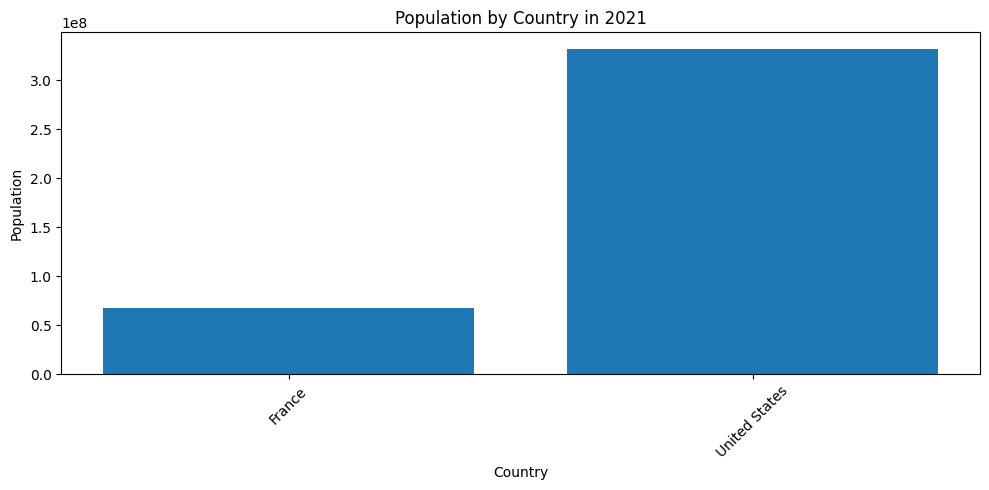

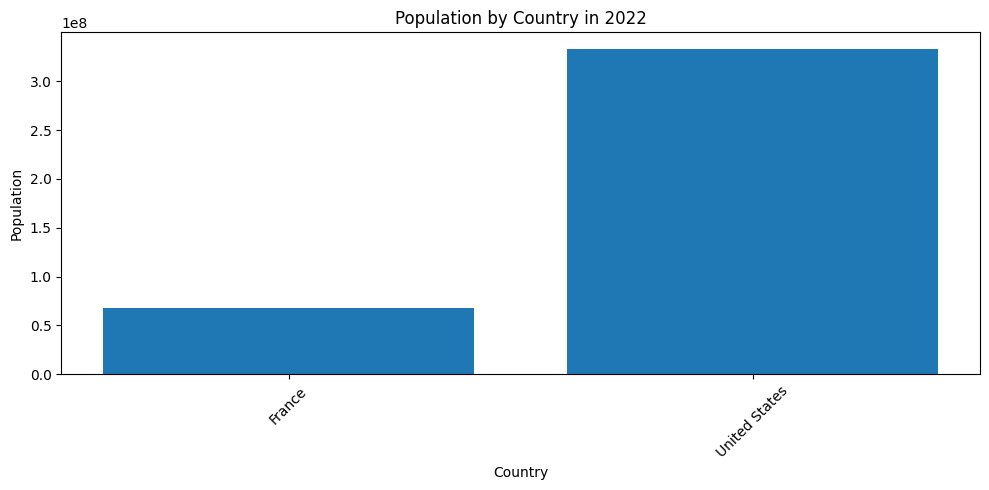

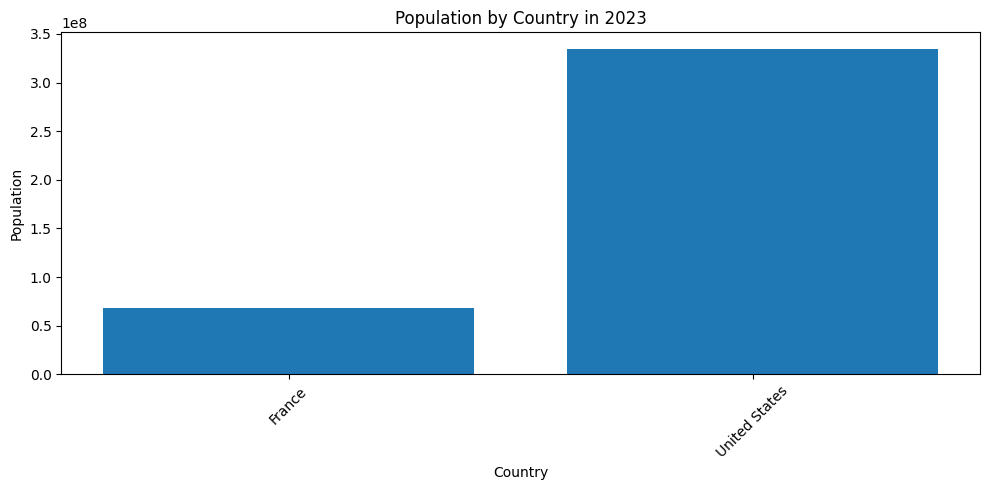

In [6]:
# Get unique years
years = df['Years'].unique()

# Generate bar charts for each year
for year in years:
    df_year = df[df['Years'] == year]
    
    plt.figure(figsize=(10, 5))
    plt.bar(df_year['Country'], df_year['Population'])
    plt.xlabel('Country')
    plt.ylabel('Population')
    plt.title(f'Population by Country in {year}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.show()


C:\Users\Sam\miniconda\Lib\site-packages\matplotlib\animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


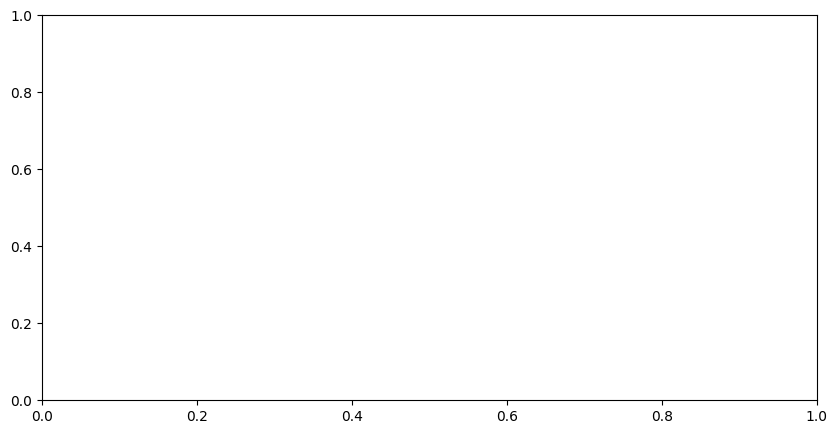

In [8]:


# Get unique years
years = sorted(df['Years'].unique())

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

def update(year):
    ax.clear()
    df_year = df[df['Years'] == year]
    
    ax.bar(df_year['Country'], df_year['Population'])
    ax.set_xlabel('Country')
    ax.set_ylabel('Population')
    ax.set_title(f'Population by Country in {year}')
    ax.set_xticklabels(df_year['Country'], rotation=45)
    ax.set_ylim(0, df['Population'].max() * 1.1)  # Set consistent y-axis range
    
# Create animation
ani = animation.FuncAnimation(fig, update, frames=years, interval=1000, repeat=True)

plt.show()

C:\Users\Sam\miniconda\Lib\site-packages\matplotlib\animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
C:\Users\Sam\miniconda\Lib\site-packages\matplotlib\animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


ValueError: unknown file extension: .mp4

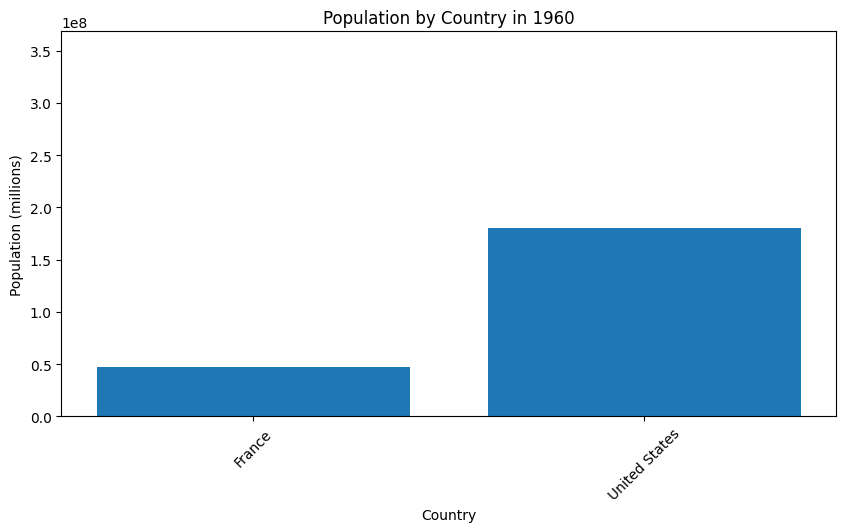

In [12]:
# Get unique years
years = sorted(df['Years'].unique())

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

def update(year):
    ax.clear()
    df_year = df[df['Years'] == year]
    
    ax.bar(df_year['Country'], df_year['Population'])
    ax.set_xlabel('Country')
    ax.set_ylabel('Population (millions)')
    ax.set_title(f'Population by Country in {year}')
    ax.set_xticks(range(len(df_year['Country'])))
    ax.set_xticklabels(df_year['Country'], rotation=45)
    ax.set_ylim(0, df['Population'].max() * 1.1)  # Set consistent y-axis range

# Store animation in a variable to prevent garbage collection
ani = animation.FuncAnimation(fig, update, frames=years, interval=1000, repeat=True)
ani.save('population_animation.mp4', writer='ffmpeg', fps=1)